In [ ]:


import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msno
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel('raw.xlsx')
df.tail()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.shape

(10683, 11)

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.drop_duplicates(keep='first' , inplace = True)

In [8]:
df.shape

(10462, 11)

# cleaning

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Month'] = df['Date_of_Journey'].dt.month
df['JourneyDay'] = df['Date_of_Journey'].dt.day
df['Weekday'] = df['Date_of_Journey'].dt.weekday

df['Month'] = df['Month'].astype("int")

In [11]:
df.drop('Date_of_Journey' , axis = 1 , inplace = True)

In [12]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,JourneyDay,Weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,4


In [13]:
# cleaning Total_Stops column:


def total_stops(cols):
    if (cols=='non-stop'):
        return 0
    else : 
        
        cols=cols.strip()
        
    return int(cols.split(' ')[0])




In [14]:
df['Total_Stops'] = df['Total_Stops'].apply(total_stops)


In [15]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,JourneyDay,Weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,3,24,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,5,12,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,4


In [16]:
# converting duration into minutes


def times(x):
    x=x.strip() #---------------------------help to strip leading and trailing white space
    x=x.split(' ') #------------------------split = 2h 50m  ----> ['2h' , '50m']
    to = x[0] #----------------------------- to = '2h

    hrs = (int)(to[:-1])*60  #---------------------[:-1] helps to remove h



    if len(x) >1 : 
        minutes = (int)(x[1][:-1])
        hrs += minutes

    return str(hrs)
    

    


In [17]:
df['Duration'] = df['Duration'].apply(times)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,JourneyDay,Weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897,3,24,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662,5,1,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882,6,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218,5,12,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302,3,1,4


In [18]:
df['Month'].value_counts()



df['Month'] = df['Month'].replace({3:"March" , 4:"April" , 5:"May" , 6:"June"})

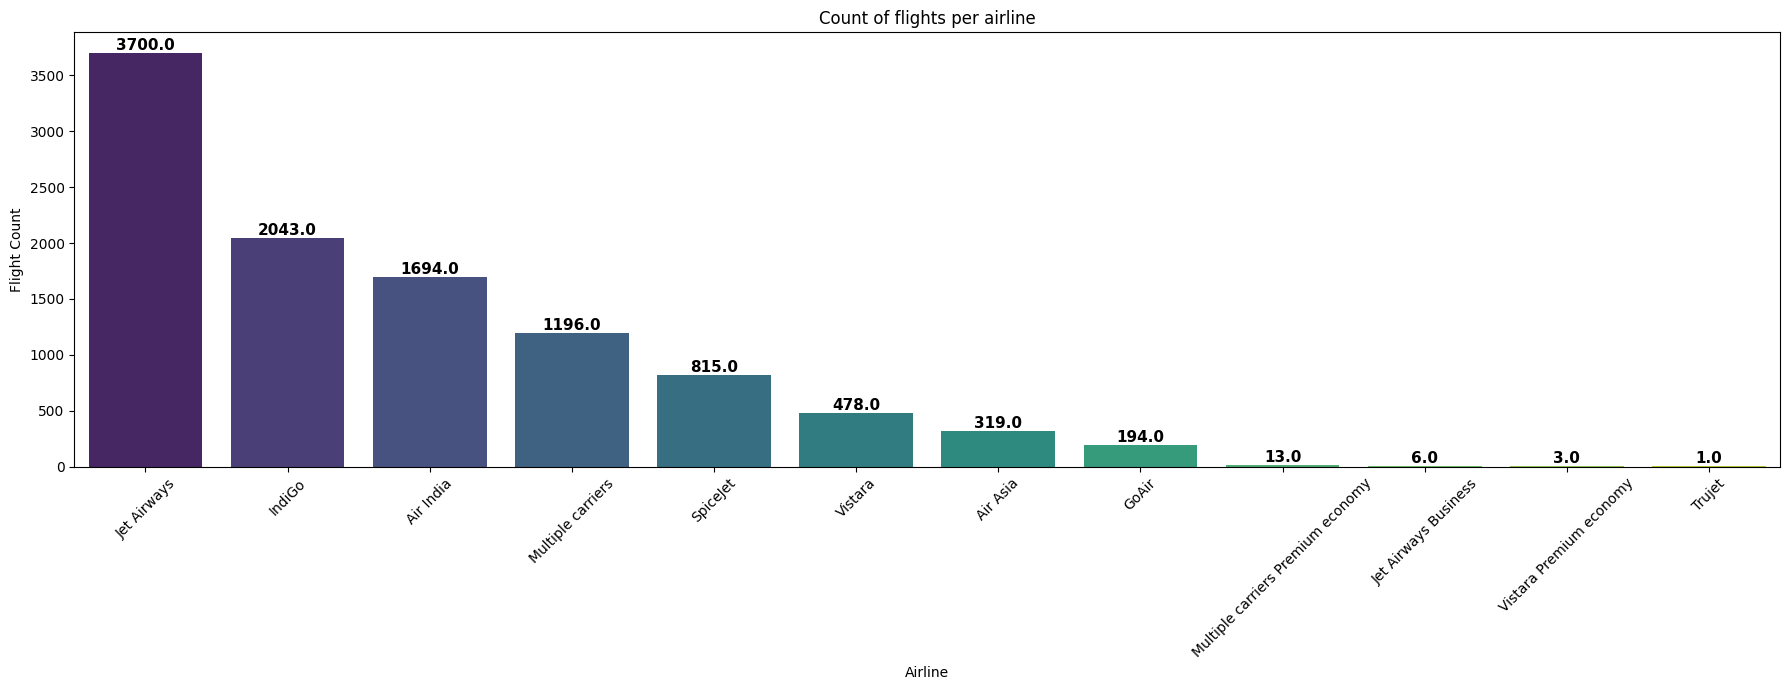

In [19]:
plt.figure(figsize = (18 , 7))
ax = sns.countplot(data = df , x = 'Airline' , order=df['Airline'].value_counts().index,palette='viridis')
plt.title("Count of flights per airline")
plt.xlabel('Airline')
plt.ylabel('Flight Count')
plt.xticks(rotation = 45)



for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}' , 
                (p.get_x() + p.get_width() / 2. , height),
                ha= 'center' , va = 'bottom' , fontsize = 11 , fontweight = 'bold')
    
plt.tight_layout()
plt.show()

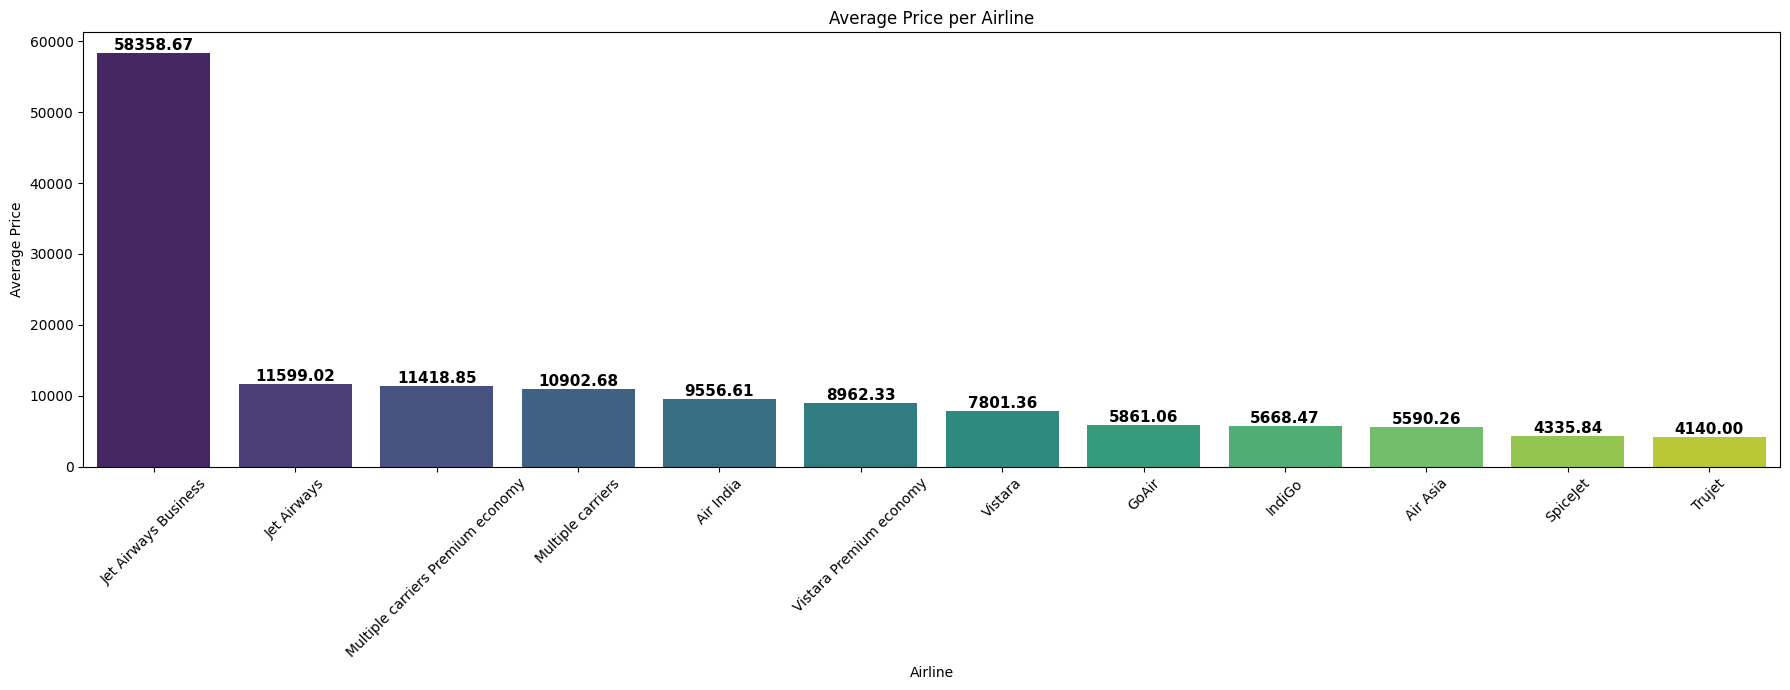

In [20]:
avg_price_of_airline = df.groupby('Airline')['Price'].mean().reset_index()
avg_price_of_airline = avg_price_of_airline.sort_values('Price', ascending=False)

plt.figure(figsize = (18,7))
ax = sns.barplot(data = avg_price_of_airline ,x='Airline', y='Price',palette='viridis' )
plt.title("Average Price per Airline")
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation = 45)



for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}' , 
                (p.get_x() + p.get_width() / 2. , height),
                ha= 'center' , va = 'bottom' , fontsize = 11 , fontweight = 'bold')
    
plt.tight_layout()
plt.show()



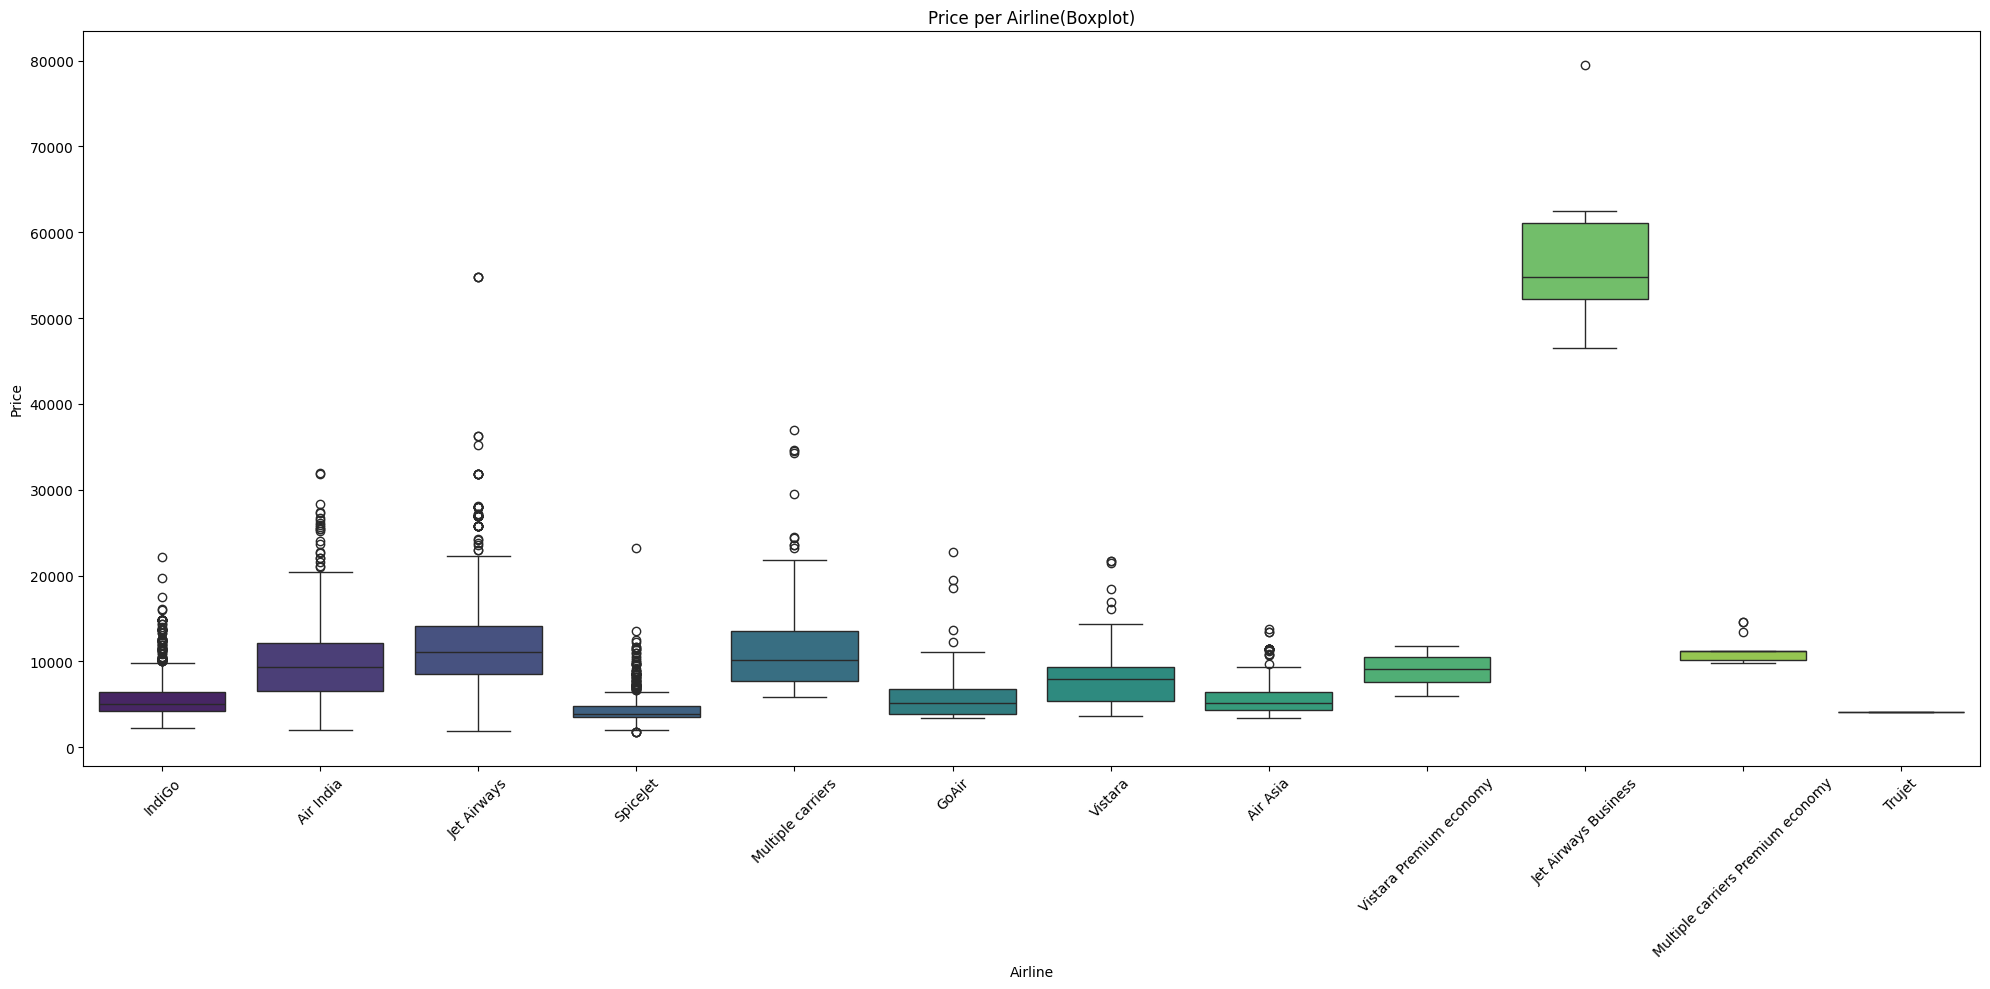

In [21]:


plt.figure(figsize = (20,10))
sns.boxplot(data = df ,x='Airline', y='Price',palette='viridis' )
plt.title("Price per Airline(Boxplot)")
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation = 45)

    
plt.tight_layout()
plt.show()



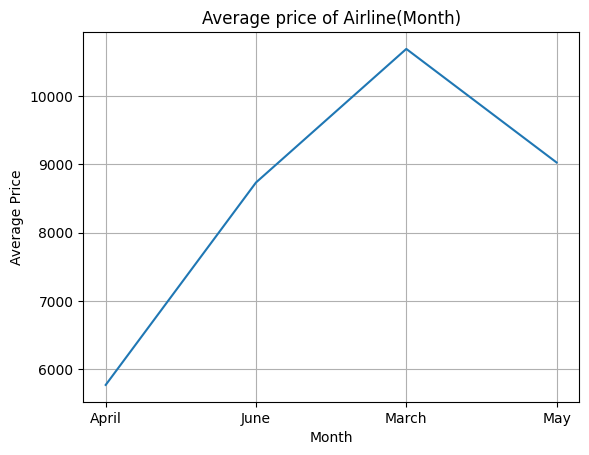

In [22]:
avg_price_month = df.groupby('Month')['Price'].mean().reset_index()


sns.lineplot(data = avg_price_month , x = 'Month' ,  y = 'Price')
plt.grid(True)
plt.title('Average price of Airline(Month)')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,JourneyDay,Weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897,March,24,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662,May,1,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882,June,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218,May,12,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302,March,1,4


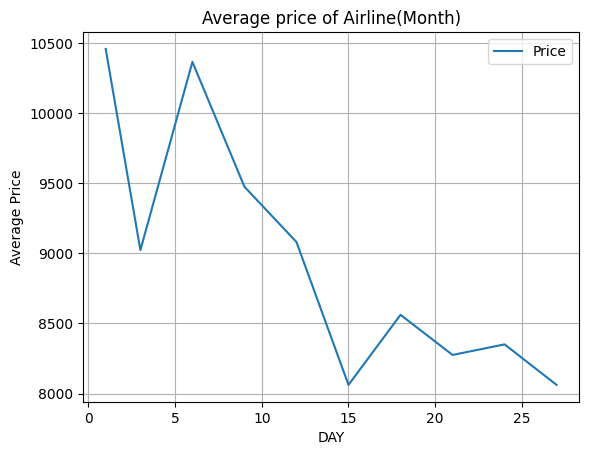

In [24]:
avg_price_day = df.groupby('JourneyDay')['Price'].mean().reset_index()

avg_price_day.plot(x = 'JourneyDay' , y = 'Price' )
plt.title('Average price of Airline(DAY)')
plt.title('Average price of Airline(Month)')
plt.xlabel('DAY')
plt.ylabel('Average Price')
plt.grid(True)



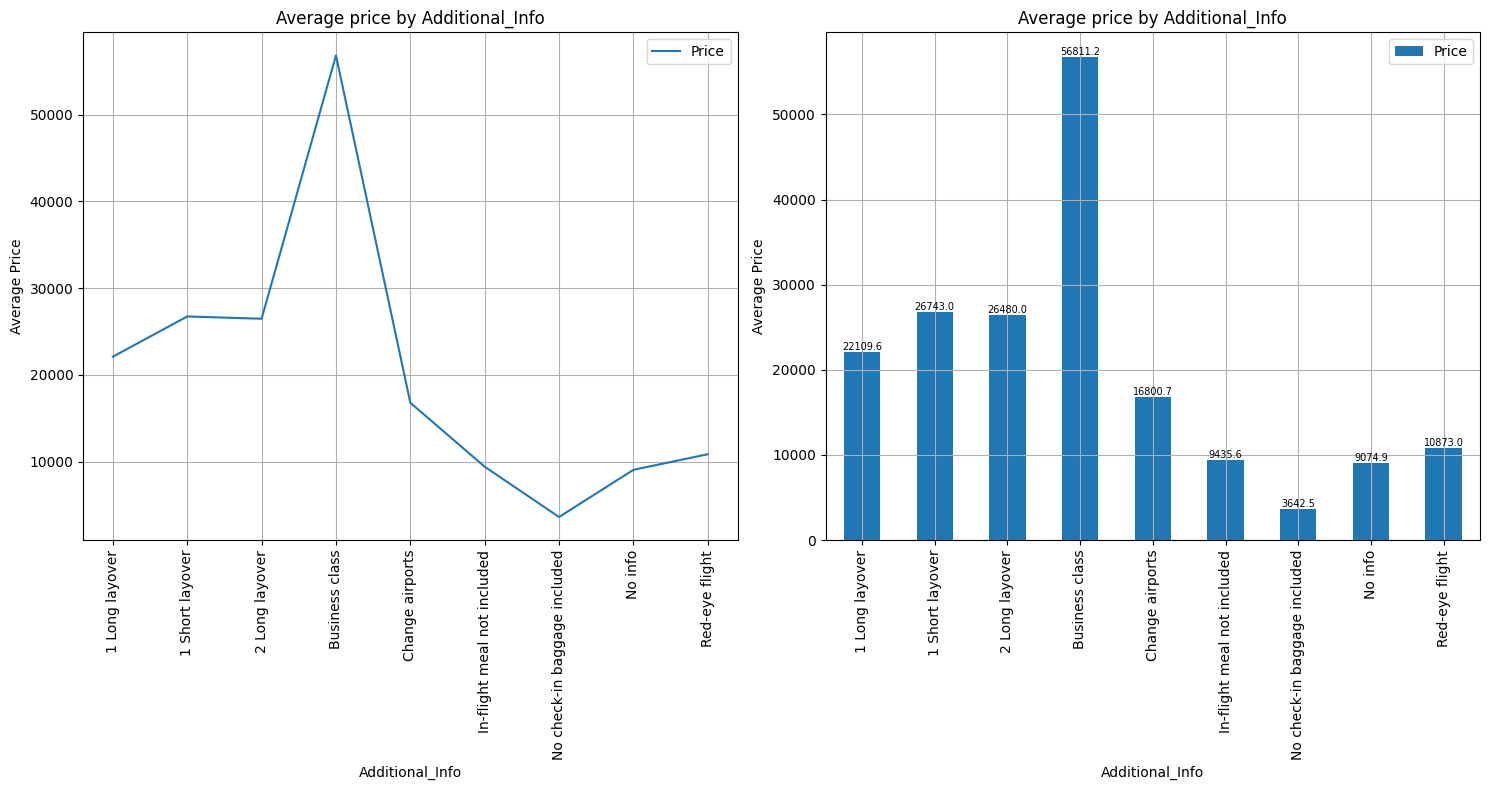

In [25]:
df['Additional_Info'] = df['Additional_Info'].replace({'No Info' : 'No info'})
avg_price_Additional_info = df.groupby('Additional_Info')['Price'].mean().reset_index()

fig , axes = plt.subplots(1,2,figsize= (15,8))



avg_price_Additional_info.plot(x = 'Additional_Info' , y = 'Price'  ,ax = axes[0])

axes[0].set_title('Average price by Additional_Info')
axes[0].set_xlabel('Additional_Info')
axes[0].set_ylabel('Average Price')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(True)





# alternative for avg price by additional_info



avg_price_Additional_info.plot(kind='bar', x='Additional_Info', y='Price', ax=axes[1],)

axes[1].set_title('Average price by Additional_Info')
axes[1].set_xlabel('Additional_Info')
axes[1].set_ylabel('Average Price')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(True)

for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.1f}' , 
                (p.get_x() + p.get_width() / 2. , height),
                ha= 'center' , va = 'bottom' , fontsize = 7 )
    

plt.tight_layout()
plt.show()

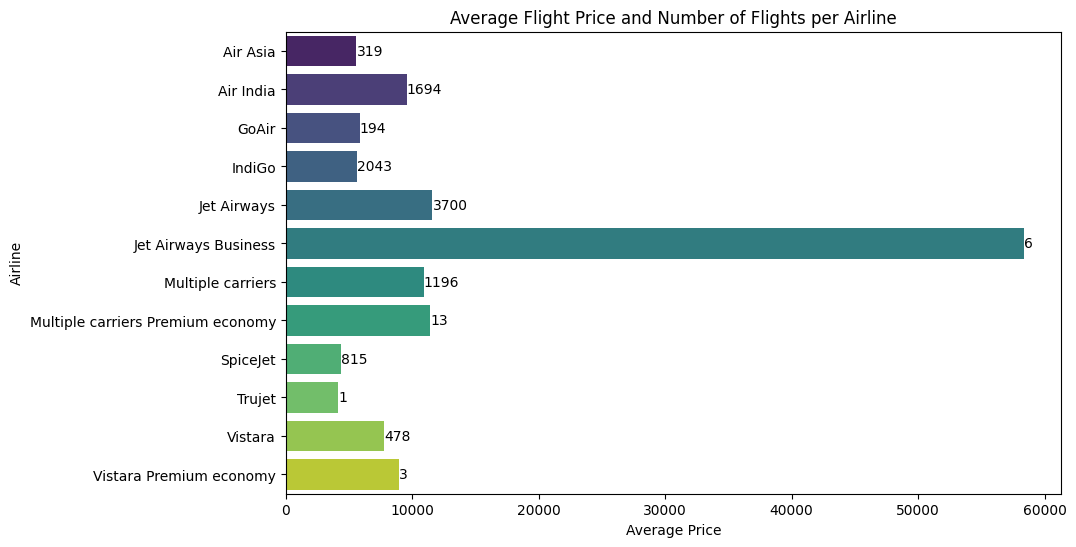

In [26]:
airline_stats = df.groupby('Airline').agg(
    avg_price = ('Price' , 'mean') , 
    flight_count = ("Price" , 'size')
).reset_index()


plt.figure(figsize = (10,6))

sns.barplot(x= 'avg_price' , y ='Airline'  , data = airline_stats , palette='viridis')

for index, row in airline_stats.iterrows():
    plt.text(row['avg_price'], index, f'{row["flight_count"]}', color='black', ha="left", va="center")

# Labels and title
plt.xlabel("Average Price")
plt.ylabel("Airline")
plt.title("Average Flight Price and Number of Flights per Airline")

# Show the plot
plt.show()




Text(0.5, 1.0, 'Average Flight Price and Number of Flights per Airline on Journey Day and 3')

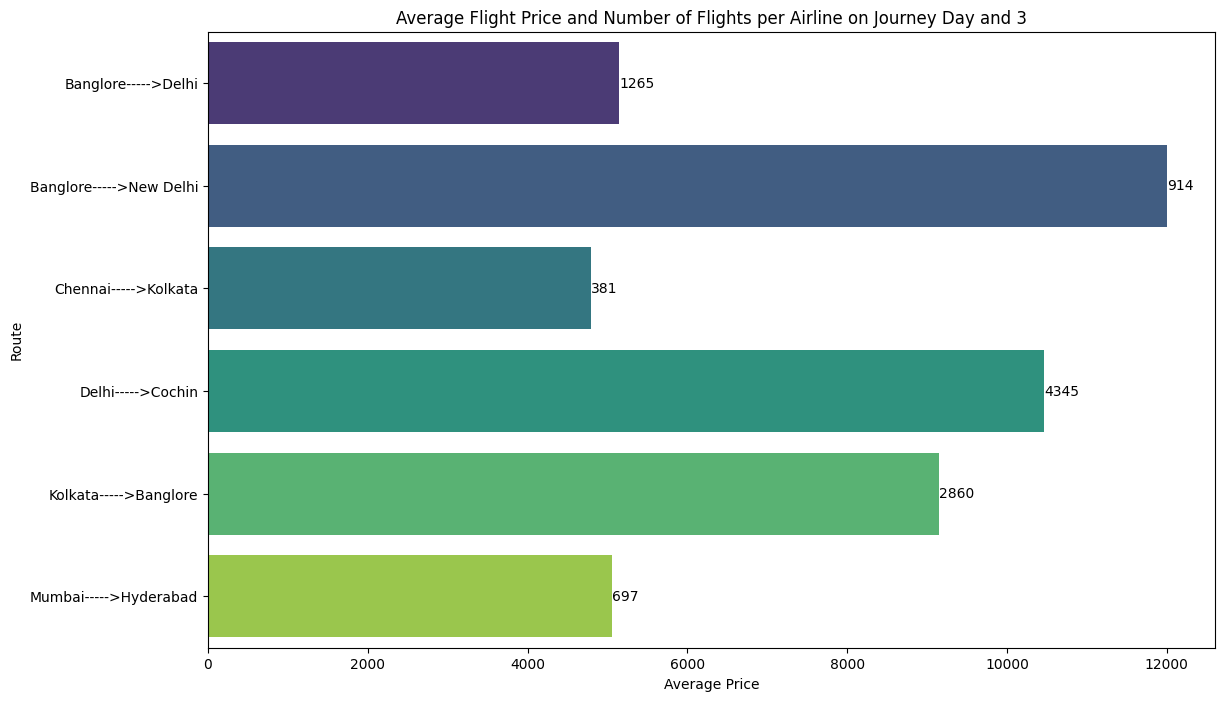

In [27]:
flight_route = df.groupby(['Source' ,'Destination' ]).agg(

    avg_prices = ('Price' , 'mean') , 
    flight_count= ("Price" , 'size')
).reset_index()

plt.figure(figsize = (13,8))
flight_route['Route'] = flight_route['Source'] + '----->' + flight_route['Destination']


sns.barplot(x = 'avg_prices' , y = 'Route' , data = flight_route , palette= 'viridis')

for index , row in flight_route.iterrows():
    plt.text(row['avg_prices'] , index , f'{row['flight_count']}' , color = 'black' , ha = 'left' , va = 'center')

plt.xlabel("Average Price")
plt.ylabel("Route")
plt.title("Average Flight Price and Number of Flights per Airline on Journey Day and 3")




<Axes: xlabel='Duration', ylabel='Price'>

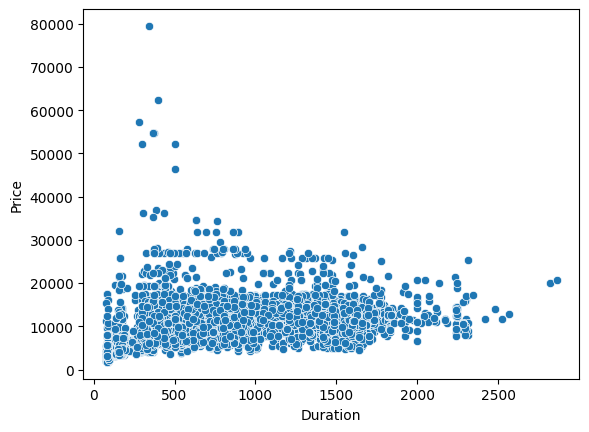

In [28]:
df["Duration"] = df["Duration"].astype(int)
sns.scatterplot(data=df, x='Duration', y='Price')

In [29]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,JourneyDay,Weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897,March,24,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662,May,1,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882,June,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218,May,12,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302,March,1,4


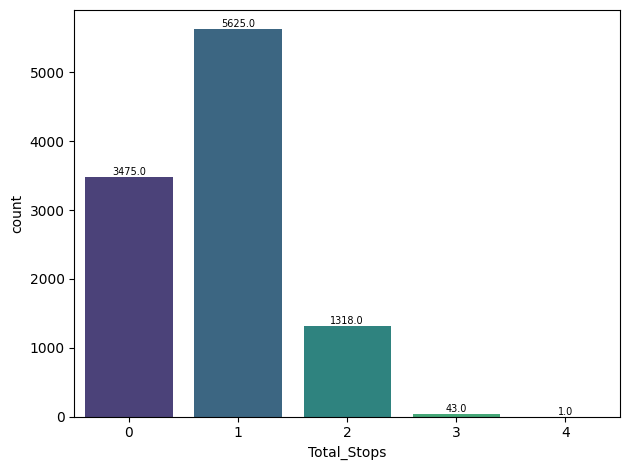

In [30]:
ax = sns.countplot(x = 'Total_Stops' , data = df , palette='viridis' )

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}' , 
                (p.get_x() + p.get_width() / 2. , height),
                ha= 'center' , va = 'bottom' , fontsize = 7 )
plt.tight_layout()
plt.show()

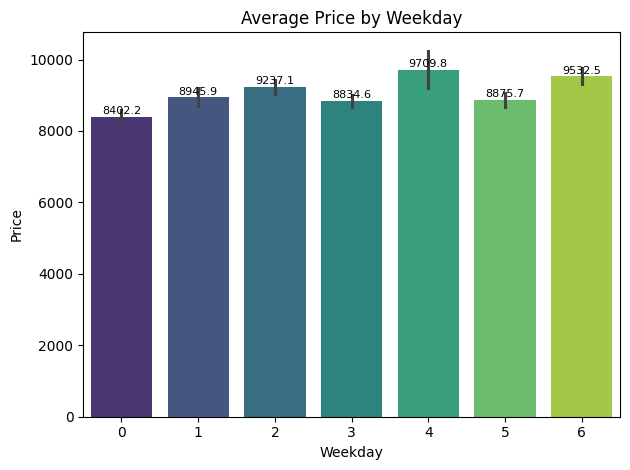

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(x='Weekday', y='Price', data=df, palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2., height + 20), 
                ha='center', va='bottom', fontsize=8)

plt.title("Average Price by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Price")

plt.tight_layout()
plt.show()


<Axes: xlabel='Price', ylabel='Count'>

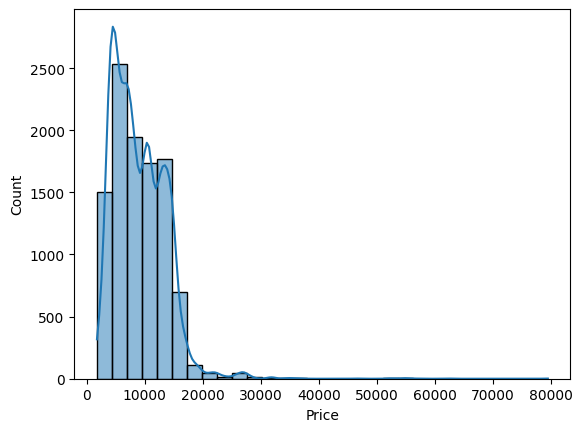

In [32]:
sns.histplot(data = df , x='Price' , kde = True , bins = 30)

In [33]:
nominal = df.select_dtypes(include= 'object')
nominal

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Additional_Info,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,No info,March
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,No info,May
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,No info,June
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,No info,May
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,No info,March
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,No info,April
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,No info,April
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,No info,April
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,No info,March


In [34]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,JourneyDay,Weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897,March,24,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662,May,1,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882,June,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218,May,12,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302,March,1,4


In [35]:
df["Arrival_Time"] = df["Arrival_Time"].str.split(" ").str[0]
# create a two new features "Arrival_hour" and "Arrival_min" from "Arrival_Time"
df["Arrival_hour"] = df["Arrival_Time"].str.split(":").str[0]
df["Arrival_min"] = df["Arrival_Time"].str.split(":").str[1]
# and Drop "Arrival_Time"
df.drop("Arrival_Time", axis =1 ,inplace =True)
# convert into int
df["Arrival_hour"] = df["Arrival_hour"].astype(int)
df["Arrival_min"] = df["Arrival_min"].astype(int)







In [36]:
df["Route_1"] = df["Route"].str.split(" → ").str[0]
df["Route_2"] = df["Route"].str.split(" → ").str[1]
df["Route_3"] = df["Route"].str.split(" → ").str[2]
df["Route_4"] = df["Route"].str.split(" → ").str[3]
df["Route_5"] = df["Route"].str.split(" → ").str[4]



df["Route_1"].fillna("None" , inplace =True)
df["Route_2"].fillna("None" , inplace =True)
df["Route_3"].fillna("None" , inplace =True)
df["Route_4"].fillna("None" , inplace =True)
df["Route_5"].fillna("None" , inplace =True)

# Drop "Route features"

df.drop("Route" , axis =1 ,inplace =True)

In [ ]:
# create a two new features "Dep_hour" and "Dep_min" from "Dep_Time"
self.df["Dep_hour"] = self.df["Dep_Time"].str.split(":").str[0]
self.df["Dep_min"] = self.df["Dep_Time"].str.split(":").str[1]
# and Drop "Arrival_Time"
self.df.drop("Dep_Time", axis =1 ,inplace =True)
# convert into int
self.df["Dep_hour"] = self.df["Dep_hour"].astype(int)
self.df["Dep_min"] = self.df["Dep_min"].astype(int)

In [38]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,JourneyDay,Weekday,Arrival_hour,Arrival_min,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,March,24,6,1,10,BLR,DEL,None,None,None,22,20
1,Air India,Kolkata,Banglore,445,2,No info,7662,May,1,2,13,15,CCU,IXR,BBI,BLR,None,5,50
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,June,9,6,4,25,DEL,LKO,BOM,COK,None,9,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,May,12,6,23,30,CCU,NAG,BLR,None,None,18,5
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,March,1,4,21,35,BLR,NAG,DEL,None,None,16,50


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Duration         10462 non-null  int64 
 4   Total_Stops      10462 non-null  int64 
 5   Additional_Info  10462 non-null  object
 6   Price            10462 non-null  int64 
 7   Month            10462 non-null  object
 8   JourneyDay       10462 non-null  int32 
 9   Weekday          10462 non-null  int32 
 10  Arrival_hour     10462 non-null  int64 
 11  Arrival_min      10462 non-null  int64 
 12  Route_1          10462 non-null  object
 13  Route_2          10462 non-null  object
 14  Route_3          10462 non-null  object
 15  Route_4          10462 non-null  object
 16  Route_5          10462 non-null  object
 17  Dep_hour         10462 non-null  int

In [40]:
df.select_dtypes(include='object')
df['Month']= df['Month'].replace({'March':3 , "April":4 , "May":5  , "June" :6})
df['Month'] = df['Month'].astype(int)

In [41]:
cat_col = df.select_dtypes(include='object')


from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for col in cat_col:
    df[col] = label.fit_transform(df[col])

<Axes: >

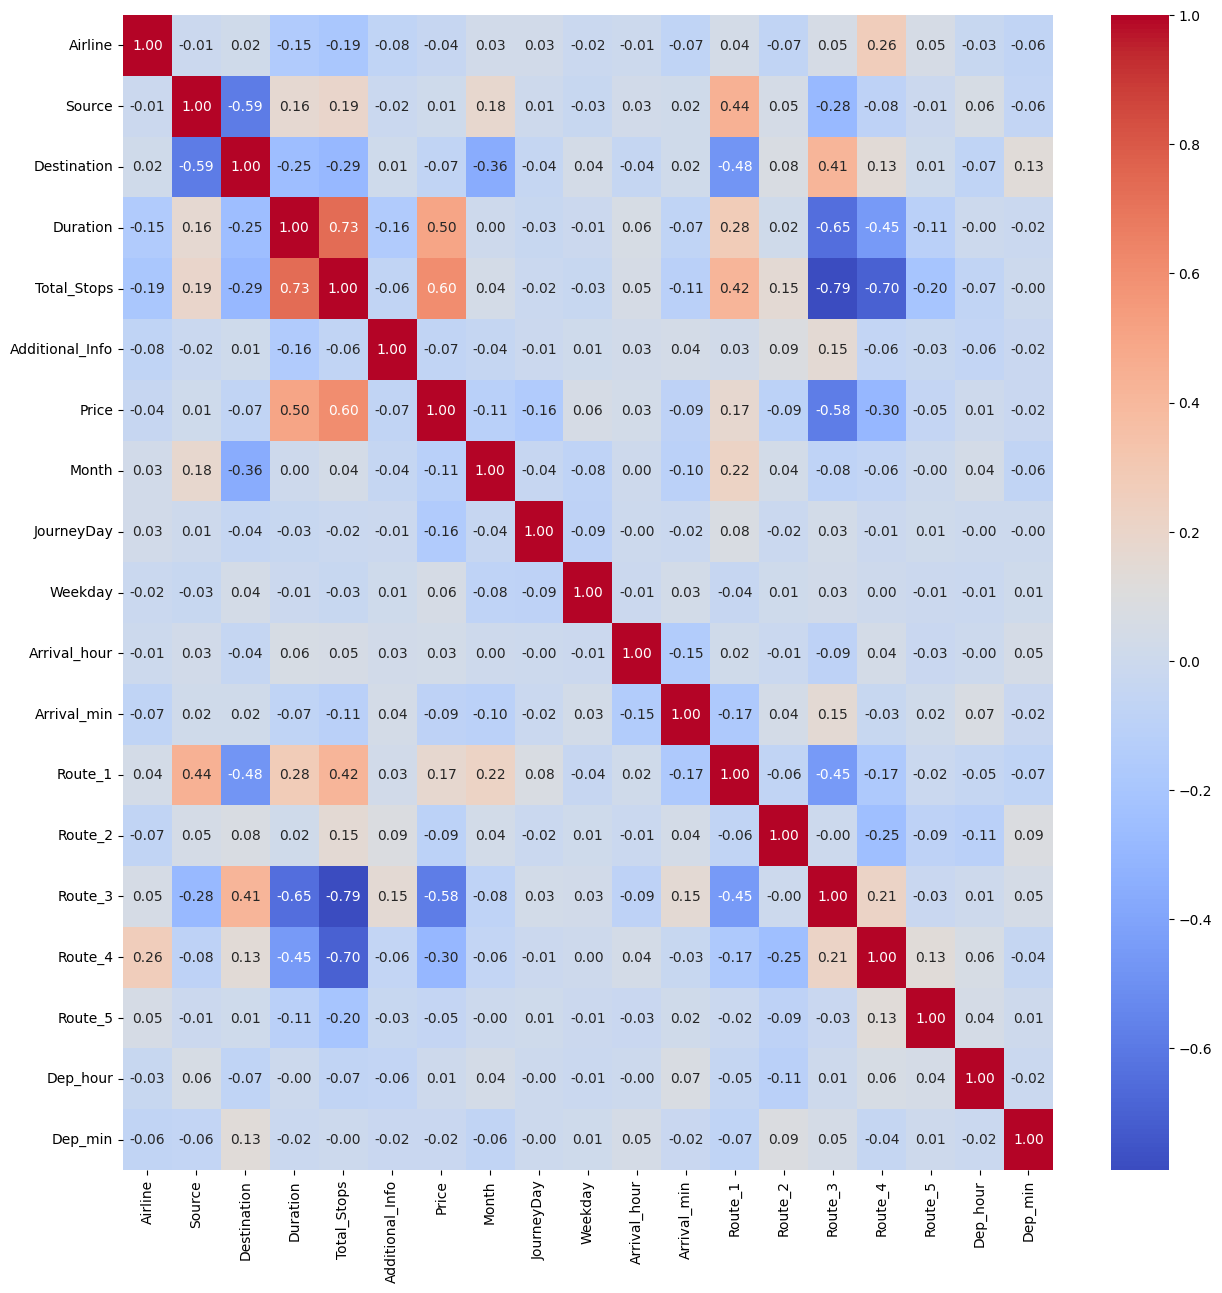

In [42]:
plt.figure(figsize=(15,15))
num_cols = df.select_dtypes(include='number').corr()
sns.heatmap(num_cols , annot= True , fmt=".2f" , cmap='coolwarm')

In [43]:
X = df.drop("Price" , axis =1)

y= df["Price"]

In [44]:
print(f"shape of x is {x.shape}")

print(f"shape of y is {y.shape}")

NameError: name 'x' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(X,y , test_size = 0.25 , random_state = 42)


In [ ]:
print(f"shape of x_train is {x_train.shape}")

print(f"shape of x_test is {x_test.shape}")

print(f"shape of y_train is {y_train.shape}")

print(f"shape of y_test is {y_test.shape}")

shape of x_train is (7846, 18)
shape of x_test is (2616, 18)
shape of y_train is (7846,)
shape of y_test is (2616,)


In [ ]:


from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

In [ ]:
scale = RobustScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
models = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR()
}


param_grids = {
    "XGBRegressor": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    "RandomForestRegressor": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10],
    },
    "LinearRegression": {},
    "Ridge": {
        'alpha': [0.1, 1.0, 10]
    },
    "Lasso": {
        'alpha': [0.01, 0.1, 1.0]
    },
    "ElasticNet": {
        'alpha': [0.1, 1.0],
        'l1_ratio': [0.1, 0.5, 0.9]
    },
    "SVR": {
        'C': [1.0, 10],
        'kernel': ['linear', 'rbf']
    }
}


In [ ]:
results = []

for name, model in models.items():
    param_grid = param_grids.get(name, {})
    grid = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results.append((name, r2, mse))

# Results as DataFrame
import pandas as pd

results_df = pd.DataFrame(results, columns=['Model', 'R2_Score', 'MSE'])
print(results_df.sort_values(by='R2_Score', ascending=False))


                   Model  R2_Score           MSE
0           XGBRegressor  0.893414  2.275753e+06
1  RandomForestRegressor  0.885020  2.454969e+06
5             ElasticNet  0.496998  1.073975e+07
3                  Ridge  0.496447  1.075150e+07
4                  Lasso  0.496204  1.075668e+07
2       LinearRegression  0.496189  1.075700e+07
6                    SVR  0.451635  1.170830e+07


In [ ]:
# Get best model name
best_model_name = results_df.sort_values(by='R2_Score', ascending=False).iloc[0]['Model']
best_model = models[best_model_name]
param_grid = param_grids[best_model_name]

# Re-train with best parameters using GridSearchCV
grid = GridSearchCV(best_model, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
final_model = grid.best_estimator_


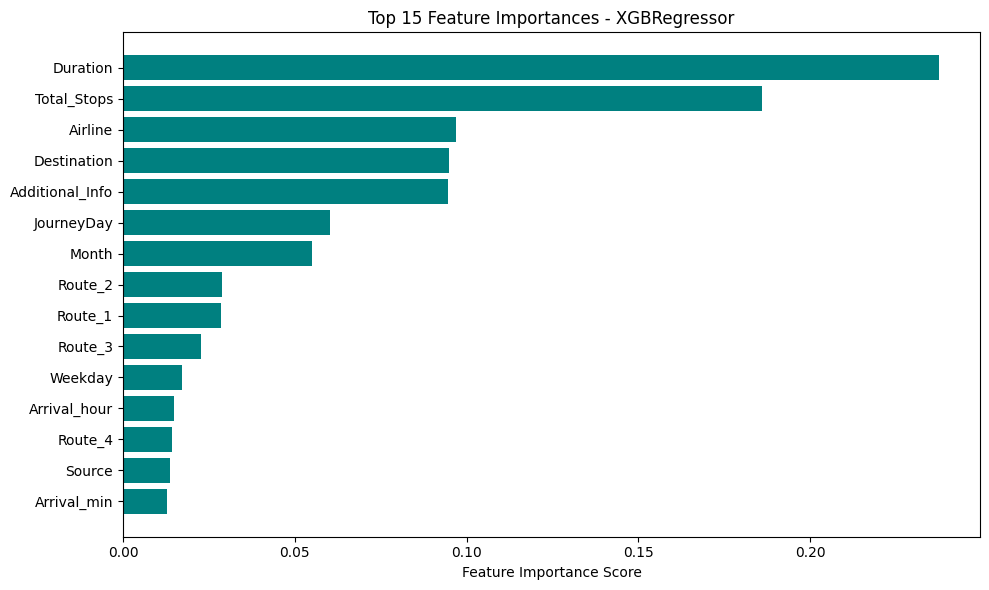

In [ ]:
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt


final_model = XGBRegressor(
    n_estimators=grid.best_params_.get('n_estimators', 100),
    learning_rate=grid.best_params_.get('learning_rate', 0.1),
    max_depth=grid.best_params_.get('max_depth', 3)
)
final_model.fit(X_train, y_train)
feature_names = X.columns  
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 15  

plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances - XGBRegressor")
plt.barh(range(top_n), importances[indices][:top_n][::-1], align='center', color='teal')
plt.yticks(range(top_n), [feature_names[i] for i in indices][:top_n][::-1])
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()
